# WRAPPING UP THE BOOK - UNDERSTANDING PERFORMANCE

The book has centered itself on stock trading, and the purpose of this chapter is to understand performance by using the f.fn() package for creating a report. I believe this is one of the most interesting tools that can be used for a quick decision making on investment that does not involve a graphical decision. This can be applied to a portfolio and individual stocks. The application of the portfolio is as follows:

## Portfolio Performance using f.fn()


### – Import libraries

In [1]:
import ffn
import numpy as np
import pandas as pd
import pandas_ta as ta
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import ffn
%matplotlib inline

### – Select stocks

In [2]:
start=datetime.datetime(2019,1,1)
end=datetime.datetime(2020,12,31)

tickers = ['ZM', 'AMZN', 'DOCU','PTON']
stocks=pd.DataFrame()
for x in tickers:
    stocks[x]=yf.download(x, start=start, end=end)['Adj Close']

stocks.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,ZM,AMZN,DOCU,PTON
Date,,,,
2020-12-23,383.880005,159.263504,244.050003,162.759995
2020-12-24,375.170013,158.634506,244.929993,162.720001
2020-12-28,351.390015,164.197998,229.199997,152.179993
2020-12-29,353.750000,166.100006,228.160004,150.100006
2020-12-30,353.399994,164.292496,225.899994,154.960007


### – Calculate returns using f.fn ()

In [3]:
stocks_return = stocks.to_returns().dropna()
stocks_return.tail()

,ZM,AMZN,DOCU,PTON
Date,,,,
2020-12-23,-0.061418,-0.006627,-0.030008,0.009615
2020-12-24,-0.022689,-0.003949,0.003606,-0.000246
2020-12-28,-0.063385,0.035071,-0.064222,-0.064774
2020-12-29,0.006716,0.011584,-0.004537,-0.013668
2020-12-30,-0.000989,-0.010882,-0.009905,0.032378


### – Calculating mean variance returns with f.fn ( )

In [4]:
mean_variance_weights=stocks_return.calc_mean_var_weights().as_format('.2%')
mean_variance_weights

ZM      16.84%
AMZN    22.13%
DOCU    25.83%
PTON    35.21%
dtype: object

### – Applying the mean variance returns to portfolio weights,

In [5]:
portfolio_weights=(0.1759,0.2111,0.2592,0.3538)
portfolio_weights

(0.1759, 0.2111, 0.2592, 0.3538)

### – Creating the portfolio based on the returns

In [6]:
portfolio_weights=portfolio_weights/np.sum(portfolio_weights)
weighted_returns_portfolio=stocks_return.mul(portfolio_weights,axis=1)
stocks_return['Portfolio']=weighted_returns_portfolio.sum(axis=1).dropna()
stocks_return.tail()

,ZM,AMZN,DOCU,PTON,Portfolio
Date,,,,,
2020-12-23,-0.061418,-0.006627,-0.030008,0.009615,-0.016579
2020-12-24,-0.022689,-0.003949,0.003606,-0.000246,-0.003977
2020-12-28,-0.063385,0.035071,-0.064222,-0.064774,-0.043309
2020-12-29,0.006716,0.011584,-0.004537,-0.013668,-0.002385
2020-12-30,-0.000989,-0.010882,-0.009905,0.032378,0.006417


### – Calculate performance


In [7]:
performance = stocks_return.calc_stats()
performance.display()


c:\Users\fvill\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\fvill\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\fvill\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\fvill\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\fvill\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, m

Stat                 ZM           AMZN        DOCU        PTON        Portfolio
-------------------  -----------  ----------  ----------  ----------  -----------
Start                2019-09-27   2019-09-27  2019-09-27  2019-09-27  2019-09-27
End                  2020-12-30   2020-12-30  2020-12-30  2020-12-30  2020-12-30
Risk-free rate       0.00%        0.00%       0.00%       0.00%       0.00%

Total Return         -97.87%      31.57%      -64.69%     -260.40%    -126.36%
Daily Sharpe         -1.50        -1.50       0.07        -           -0.96
Daily Sortino        -1.51        -1.55       0.28        inf         -1.72
CAGR                 -95.30%      24.34%      -56.24%     -           -
Max Drawdown         -1328.75%    -313.08%    -200.92%    -398.81%    -909.34%
Calmar Ratio         -0.07        0.08        -0.28       -           -

MTD                  -106.91%     27.37%      -322.50%    -52.12%     -75.12%
3m                   -109.99%     -988.95%    -191.30%    -364.48%

c:\Users\fvill\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\fvill\AppData\Local\Programs\Python\Python312\Lib\site-packages\ffn\core.py:1351: RuntimeWarning: invalid value encountered in scalar power
  return (prices.iloc[-1] / prices.iloc[0]) ** (1 / year_frac(start, end)) - 1


The result of the portfolio, during the uncertainty of 2020 with a deplorable negative 126.09% of loss, a drawdown of negative 267.83% with an average of 49.11 days. The best month of the portfolio created a 113.76% but the implication of a worse month surpasses that. With this information corrections and backtesting can be created for better performance when analyzing the data. 

If the data wants to be seen with only one stock, the process is similar as when handling the DataFrame.

In [8]:
performance = stocks_return['Portfolio'].calc_stats()
performance.display()

Stats for Portfolio from 2019-09-27 00:00:00 - 2020-12-30 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
-126.36%           -0.96  -       -909.34%

Annualized Returns:
mtd      3m        6m       ytd      1y      3y    5y    10y    incep.
-------  --------  -------  -------  ------  ----  ----  -----  --------
-75.12%  1234.06%  -54.10%  -53.29%  38.86%  -     -     -      -

Periodic:
        daily       monthly     yearly
------  ----------  ----------  --------
sharpe  -0.96       -1.34       -
mean    -19841.73%  -13905.41%  -53.29%
vol     20637.17%   10397.01%   -
skew    4.00        -3.10       -
kurt    52.23       9.85        -
best    12771.16%   114.51%     -53.29%
worst   -8757.79%   -11131.15%  -53.29%

Drawdowns:
max       avg         # days
--------  --------  --------
-909.34%  -260.94%      44.1

Misc:
---------------  ---------
avg. up month    51.60%
avg. down 

c:\Users\fvill\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\fvill\AppData\Local\Programs\Python\Python312\Lib\site-packages\ffn\core.py:1351: RuntimeWarning: invalid value encountered in scalar power
  return (prices.iloc[-1] / prices.iloc[0]) ** (1 / year_frac(start, end)) - 1


## Fund Performance using f.fn()


As seen before, there are other analyses using performance that can be done, when analyzing the prices of a stock or in this case, a fund. Although funds have not been discussed in the book, it is important to understand that the statistical methods are similar, the interpretation changes regarding the instrument. The process is as follow:

### – Selecting funds using f.fn()

In [9]:
# MSAUX:Close, Morgan Stanley Inst Asia Opp A (MSAUX)
# MGGPX:Close, Morgan Stanley Institutional Fund, Inc. Global Opportunity Portfolio (MGGPX)
# MFAPX:Close, Morgan Stanley Institutional Fund, Inc. International Advantage Portfolio (MFAPX)
# SPY:Close, SPDR S&P 500 ETF Trust (SPY)

funds=ffn.get('MSAUX:Close,MIOPX:Close,MGGPX:Close,MFAPX:Close,SPY:Close',start='2018-01-01',end='2021-01-30')
funds.tail(10)
print(funds.columns)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Index(['msauxclose', 'miopxclose', 'mggpxclose', 'mfapxclose', 'spyclose'], dtype='object')


### – Creating an SMA for the Morgan Stanley Institutional Fund, Inc. Asia Opportunity Portfolio Class A (MSAUX) using PANDAS-TA with 20 days

In [10]:
funds['MAMSAUX'] = ta.sma(funds['msauxclose'], length=20)
funds


,msauxclose,miopxclose,mggpxclose,mfapxclose,spyclose,MAMSAUX
Date,,,,,,
2018-01-02,17.280001,22.520000,22.559999,16.850000,268.769989,NaN
2018-01-03,17.360001,22.629999,22.770000,16.900000,270.470001,NaN
2018-01-04,17.500000,22.750000,22.900000,17.010000,271.609985,NaN
2018-01-05,17.709999,22.920000,23.129999,17.100000,273.420013,NaN
2018-01-08,17.790001,22.889999,23.190001,17.049999,273.920013,NaN
...,...,...,...,...,...,...
2021-01-25,34.349998,42.810001,43.990002,26.910000,384.390015,32.0655
2021-01-26,33.910000,42.509998,43.630001,26.969999,383.790009,32.2535
2021-01-27,33.110001,41.509998,42.290001,26.430000,374.410004,32.4040


### – Plotting the SMA for comparison (Fig. 3)

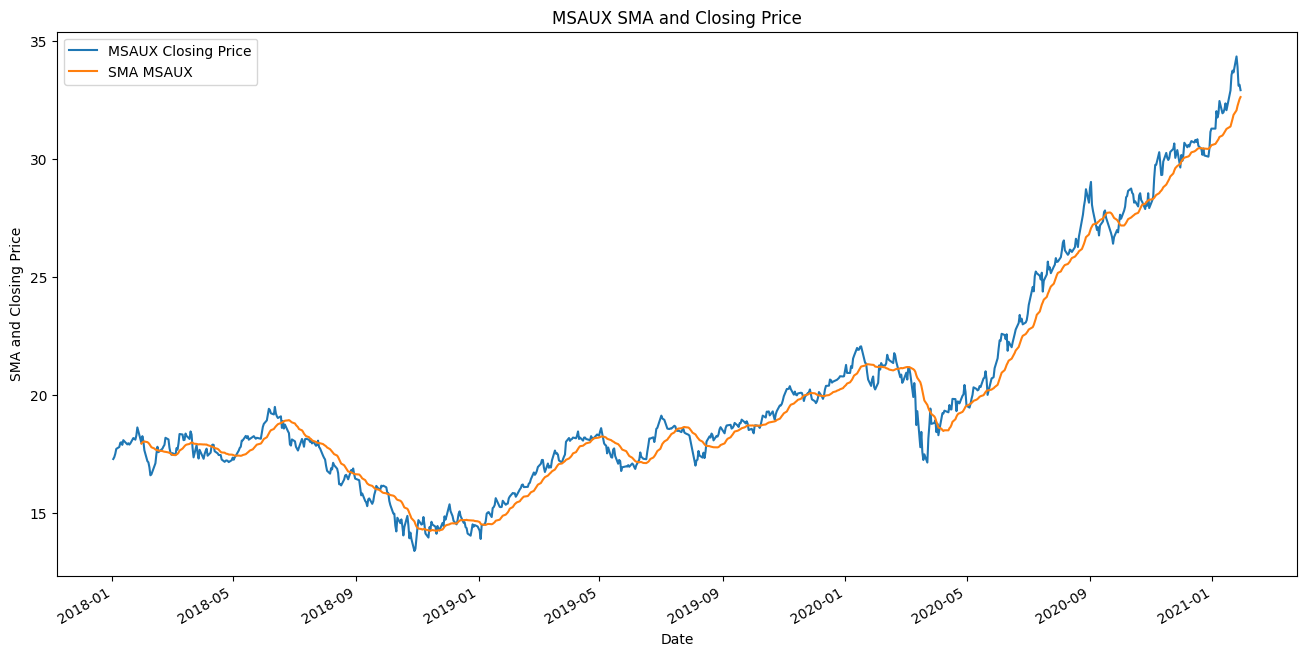

In [11]:
funds['msauxclose'].plot(label='MSAUX Closing Price',figsize=(16,8))
funds['MAMSAUX'].plot(label='SMA MSAUX')
_=plt.xlabel('Date')
_=plt.ylabel('SMA and Closing Price')
_=plt.title('MSAUX SMA and Closing Price')
plt.legend();

### – Creating an EMA for the Morgan Stanley Institutional Fund, Inc. Asia Opportunity Portfolio Class A (MSAUX) using PANDAS-TA with 20 days (Fig. 4)

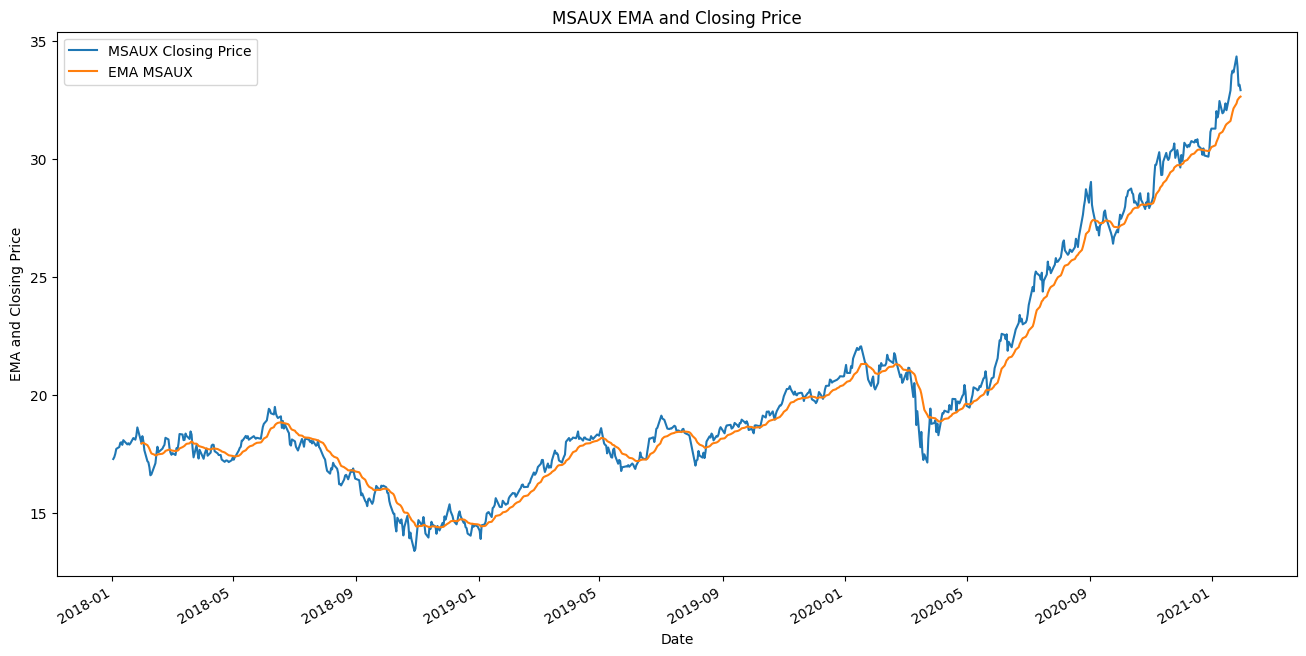

In [12]:
funds['EMAMSAUX'] = ta.ema(funds['msauxclose'], length=20)
funds
funds['msauxclose'].plot(label='MSAUX Closing Price',figsize=(16,8))
funds['EMAMSAUX'].plot(label='EMA MSAUX')
_=plt.xlabel('Date')
_=plt.ylabel('EMA and Closing Price')
_=plt.title('MSAUX EMA and Closing Price')

plt.legend();


### – Creating Bollinger Bands for the Morgan Stanley Institutional Fund, Inc. Asia Opportunity Portfolio Class A (MSAUX) using PANDAS-TA with 20 days (Fig. 5)

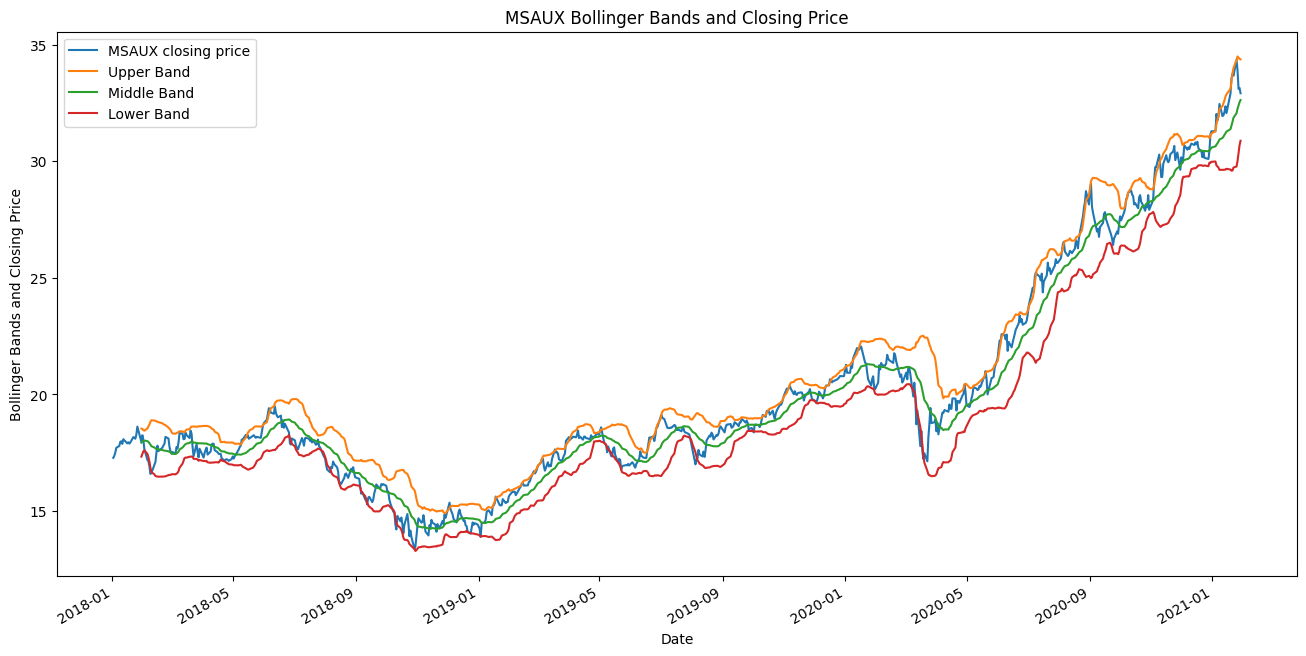

In [15]:

# Calcular las Bollinger Bands usando pandas_ta
bbands = ta.bbands(funds['msauxclose'], length=20)

# Asignar las bandas a columnas separadas en el DataFrame 'funds'
funds['up_band'] = bbands['BBU_20_2.0']
funds['mid_band'] = bbands['BBM_20_2.0']
funds['low_band'] = bbands['BBL_20_2.0']

# Graficar los datos
plt.figure(figsize=(16, 8))
funds['msauxclose'].plot(label='MSAUX closing price')
funds['up_band'].plot(label='Upper Band')
funds['mid_band'].plot(label='Middle Band')
funds['low_band'].plot(label='Lower Band')

plt.xlabel('Date')
plt.ylabel('Bollinger Bands and Closing Price')
plt.title('MSAUX Bollinger Bands and Closing Price')
plt.legend()
plt.show()

